ELERIAN AI TASK 2

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx
import numpy as np


# ClaimBuster Dataset
Let's first upload the ClaimBuster dataset.

In [322]:
all_sentences = pd.read_csv('/Users/andreavento/Documents/Elerian AI/Task 2 NER/ClaimBuster_Datasets/datasets/all_sentences.csv')
crowdsourced = pd.read_csv('/Users/andreavento/Documents/Elerian AI/Task 2 NER/ClaimBuster_Datasets/datasets/crowdsourced.csv')
groundtruth = pd.read_csv('/Users/andreavento/Documents/Elerian AI/Task 2 NER/ClaimBuster_Datasets/datasets/groundtruth.csv')

In [323]:
all_sentences

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,Speaker_role,File_id,Length,Line_number,Sentiment
0,1,"September 25, 1988",Information,None,None,None,1988-09-25.txt,3,1,NaN
1,2,The First Bush-Dukakis Presidential Debate,Information,None,None,None,1988-09-25.txt,5,2,0.000000
2,3,Good evening.,Jim Lehrer,NaN,NaN,Moderator,1988-09-25.txt,2,3,0.343189
3,4,On behalf of the Commission on Presidential De...,Jim Lehrer,NaN,NaN,Moderator,1988-09-25.txt,23,4,0.810043
4,5,I'm Jim Lehrer of the McNeil-Lehrer News Hour.,Jim Lehrer,NaN,NaN,Moderator,1988-09-25.txt,8,5,0.000000
...,...,...,...,...,...,...,...,...,...,...
32067,34465,Now the decision is up to you.,Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,7,1344,0.000000
32068,34466,"While millions have already voted, Election Da...",Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,14,1345,0.000000
32069,34467,One thing everyone here can agree on: We hope ...,Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,13,1346,0.659700
32070,34468,It is one of the honors and obligations of liv...,Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,14,1347,0.847200


In [324]:
crowdsourced

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict
0,16,I think we've seen a deterioration of values.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,8,16,0.000000,-1
1,17,I think for a while as a nation we condoned th...,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,16,17,-0.456018,-1
2,18,"For a while, as I recall, it even seems to me ...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,29,18,-0.805547,-1
3,19,"So we've seen a deterioration in values, and o...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,35,19,0.698942,-1
4,20,"We got away, we got into this feeling that val...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,15,20,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...
22496,34452,You get shot walking to the store.,Donald Trump,Businessman,REPUBLICAN,2016-10-19.txt,7,1331,0.000000,0
22497,34455,I will do more for African-Americans and Latin...,Donald Trump,Businessman,REPUBLICAN,2016-10-19.txt,16,1334,0.000000,-1
22498,34456,All she's done is talk to the African-American...,Donald Trump,Businessman,REPUBLICAN,2016-10-19.txt,30,1335,0.000000,-1
22499,34457,"We are going to make America strong again, and...",Donald Trump,Businessman,REPUBLICAN,2016-10-19.txt,23,1336,0.812600,-1


In [325]:
groundtruth

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict
0,26,"You know, I saw a movie - ""Crocodile Dundee.""",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,9,26,0.000000,0
1,80,We're consuming 50 percent of the world's coca...,Michael Dukakis,Governor,DEMOCRAT,1988-09-25.txt,8,80,-0.740979,1
2,129,That answer was about as clear as Boston harbor.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,9,129,0.000000,-1
3,131,Let me help the governor.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,5,131,0.212987,-1
4,172,We've run up more debt in the last eight years...,Michael Dukakis,Governor,DEMOCRAT,1988-09-25.txt,22,172,-0.268506,1
...,...,...,...,...,...,...,...,...,...,...
1027,28958,He has promised a trillion dollars out of the ...,Al Gore,Vice President,DEMOCRAT,2000-10-17.txt,24,953,0.363438,1
1028,28965,(LAUGHTER) I -- there's an old high school deb...,George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,23,960,-0.679982,-1
1029,29011,"Well, can I answer that?",George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,5,1006,0.413020,-1
1030,29060,I look forward to the final weeks of this camp...,George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,10,1055,0.625957,-1


As we can see and understand from the description: 
•'all_sentences' contains all the instances. 
Both 'groundtruth' and 'crouwdsourced' present additional annotations to verify the reliability of the sentences, but:
•'groundtruth' contains only sentences verified by experts: 
•'crowdsourced' has been assessed by non-experts. 

In [326]:
# Let's check if there are overlaps in the dataframes

overlapping_sentence_ids = set(crowdsourced['Sentence_id']).intersection(set(groundtruth['Sentence_id']))
overlapping_sentence_ids

set()

No overlaps, we'll just merge the 'all_sentences' dataset with the others to achieve the maximum amount of training data possible, additionally, we could
choose not to include the 'groudtruth' verdicts and use them as a validation set.

In [327]:
merged_all_crowdsourced = pd.merge(all_sentences, crowdsourced[['Sentence_id', 'Verdict']], on='Sentence_id', how='left', suffixes=('', '_crowdsourced'))
merged_all_crowdsourced_groundtruth = pd.merge(merged_all_crowdsourced, groundtruth[['Sentence_id', 'Verdict']], on='Sentence_id', how='left', suffixes=('', '_groundtruth'))
merged_all_crowdsourced_groundtruth

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,Speaker_role,File_id,Length,Line_number,Sentiment,Verdict,Verdict_groundtruth
0,1,"September 25, 1988",Information,None,None,None,1988-09-25.txt,3,1,NaN,NaN,NaN
1,2,The First Bush-Dukakis Presidential Debate,Information,None,None,None,1988-09-25.txt,5,2,0.000000,NaN,NaN
2,3,Good evening.,Jim Lehrer,NaN,NaN,Moderator,1988-09-25.txt,2,3,0.343189,NaN,NaN
3,4,On behalf of the Commission on Presidential De...,Jim Lehrer,NaN,NaN,Moderator,1988-09-25.txt,23,4,0.810043,NaN,NaN
4,5,I'm Jim Lehrer of the McNeil-Lehrer News Hour.,Jim Lehrer,NaN,NaN,Moderator,1988-09-25.txt,8,5,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32067,34465,Now the decision is up to you.,Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,7,1344,0.000000,NaN,NaN
32068,34466,"While millions have already voted, Election Da...",Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,14,1345,0.000000,NaN,NaN
32069,34467,One thing everyone here can agree on: We hope ...,Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,13,1346,0.659700,NaN,NaN
32070,34468,It is one of the honors and obligations of liv...,Chris Wallace,"Correspondent, Fox News",NaN,Moderator,2016-10-19.txt,14,1347,0.847200,NaN,NaN


Since we know there is no overlap in verdicts, let's create a single column 'Verdict', which we will use as label. Additionally, we will remove rows containing ambiguous labels. Information will me concatenated in the 'Text' column to ensure consistency with the following dataset

In [328]:
# Filter rows where either Verdict or Verdict_groundtruth is not NaN
filtered_verdicts = merged_all_crowdsourced_groundtruth.dropna(subset=['Verdict', 'Verdict_groundtruth'], how='all')

# Despite knowing there is no overlap, we decide to prioritise 'groundtruth' just in case
filtered_verdicts = filtered_verdicts.copy() 
filtered_verdicts.loc[:, 'Unified_Verdict'] = filtered_verdicts.apply(
    lambda row: row['Verdict_groundtruth'] if pd.notna(row['Verdict_groundtruth']) else row['Verdict'], axis=1
)

filtered_verdicts.drop('Verdict', axis=1, inplace=True)
filtered_verdicts.drop('Verdict_groundtruth', axis=1, inplace=True)

filtered_verdicts.drop(['Sentiment', 'Length', 'File_id', 'Sentence_id', 'Line_number'], axis=1, inplace=True)

filtered_verdicts 

,Text,Speaker,Speaker_title,Speaker_party,Speaker_role,Unified_Verdict
15,I think we've seen a deterioration of values.,George Bush,Vice President,REPUBLICAN,Candidate,-1.0
16,I think for a while as a nation we condoned th...,George Bush,Vice President,REPUBLICAN,Candidate,-1.0
17,"For a while, as I recall, it even seems to me ...",George Bush,Vice President,REPUBLICAN,Candidate,-1.0
18,"So we've seen a deterioration in values, and o...",George Bush,Vice President,REPUBLICAN,Candidate,-1.0
19,"We got away, we got into this feeling that val...",George Bush,Vice President,REPUBLICAN,Candidate,-1.0
...,...,...,...,...,...,...
32054,You get shot walking to the store.,Donald Trump,Businessman,REPUBLICAN,Candidate,0.0
32057,I will do more for African-Americans and Latin...,Donald Trump,Businessman,REPUBLICAN,Candidate,-1.0
32058,All she's done is talk to the African-American...,Donald Trump,Businessman,REPUBLICAN,Candidate,-1.0
32059,"We are going to make America strong again, and...",Donald Trump,Businessman,REPUBLICAN,Candidate,-1.0


In [329]:
data_CB = filtered_verdicts[filtered_verdicts['Unified_Verdict'] != 0.0]

data_CB['Text'] = data_CB.apply(
    lambda row: f"{row['Speaker']} ({row['Speaker_title']}, {row['Speaker_party']}): {row['Text']}", axis=1
)


data_CB = data_CB[['Text', 'Unified_Verdict']]

data_CB

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_27913/3403149952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CB['Text'] = data_CB.apply(


,Text,Unified_Verdict
15,"George Bush (Vice President, REPUBLICAN): I th...",-1.0
16,"George Bush (Vice President, REPUBLICAN): I th...",-1.0
17,"George Bush (Vice President, REPUBLICAN): For ...",-1.0
18,"George Bush (Vice President, REPUBLICAN): So w...",-1.0
19,"George Bush (Vice President, REPUBLICAN): We g...",-1.0
...,...,...
32053,"Donald Trump (Businessman, REPUBLICAN): Our in...",-1.0
32057,"Donald Trump (Businessman, REPUBLICAN): I will...",-1.0
32058,"Donald Trump (Businessman, REPUBLICAN): All sh...",-1.0
32059,"Donald Trump (Businessman, REPUBLICAN): We are...",-1.0


<Axes: xlabel='Unified_Verdict', ylabel='Count'>

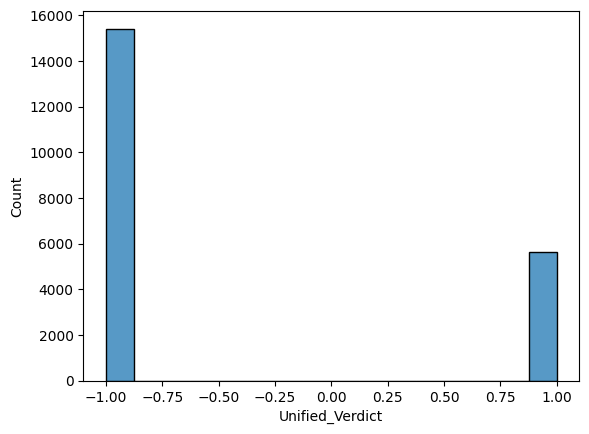

In [330]:
sns.histplot(data_CB['Unified_Verdict'])

# Fake News Detection Dataset

In [331]:
FN_dataset = pd.read_csv('/Users/andreavento/Documents/Elerian AI/Task 2 NER/FakeNewsNet.csv')
FN_dataset.drop('news_url', axis=1, inplace=True)
FN_dataset.drop('source_domain', axis=1, inplace=True)
FN_dataset.drop('tweet_num', axis=1, inplace=True)
FN_dataset

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1
...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,0
23193,Jessica Chastain Recalls the Moment Her Mother...,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",0


Let's process the dataset so that it aligns with the structure of the ClaimBuster dataset. 

In [332]:
FN_dataset['Text'] = FN_dataset['title']
FN_dataset['Unified_Verdict'] = FN_dataset['real'].apply(lambda x: -1.0 if x == 0 else 1.0)

FN_dataset = FN_dataset[['Text', 'Unified_Verdict']]
FN_dataset

,Text,Unified_Verdict
0,Kandi Burruss Explodes Over Rape Accusation on...,1.0
1,People's Choice Awards 2018: The best red carp...,1.0
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1.0
3,Colombian singer Maluma sparks rumours of inap...,1.0
4,Gossip Girl 10 Years Later: How Upper East Sid...,1.0
...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1.0
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,-1.0
23193,Jessica Chastain Recalls the Moment Her Mother...,1.0
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",-1.0


<Axes: xlabel='Unified_Verdict', ylabel='Count'>

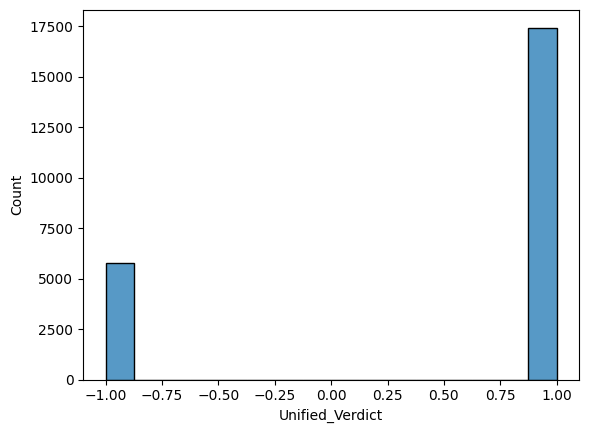

In [333]:
sns.histplot(FN_dataset['Unified_Verdict'])

# Dataset Merge: Data

In [334]:
data = pd.concat([data_CB, FN_dataset], ignore_index=True)
data

,Text,Unified_Verdict
0,"George Bush (Vice President, REPUBLICAN): I th...",-1.0
1,"George Bush (Vice President, REPUBLICAN): I th...",-1.0
2,"George Bush (Vice President, REPUBLICAN): For ...",-1.0
3,"George Bush (Vice President, REPUBLICAN): So w...",-1.0
4,"George Bush (Vice President, REPUBLICAN): We g...",-1.0
...,...,...
44258,Pippa Middleton wedding: In case you missed it...,1.0
44259,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,-1.0
44260,Jessica Chastain Recalls the Moment Her Mother...,1.0
44261,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",-1.0


<Axes: xlabel='Unified_Verdict', ylabel='Count'>

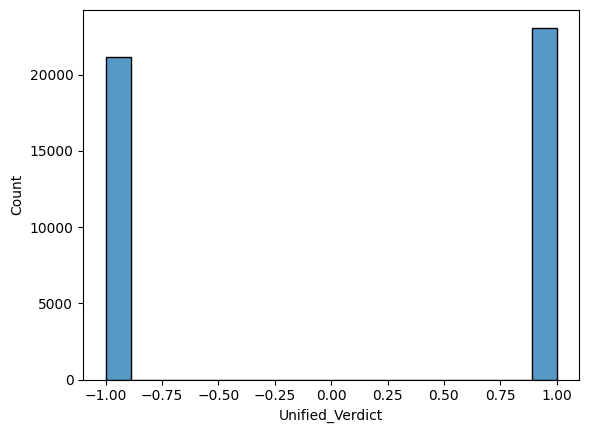

In [335]:
sns.histplot(data['Unified_Verdict'])

The combined Dataset is fairly balanced

# Final Data Data

In [336]:
data_f = pd.read_csv('/Users/andreavento/Downloads/archive-14/Fake.csv') 
data_f['Unified_Verdict'] = -1.0
data_v = pd.read_csv('/Users/andreavento/Downloads/archive-14/True.csv') 
data_v['Unified_Verdict'] = 1.0
data = pd.concat([data_f, data_v])
data['Text'] = data['title'] + data['text']
data.drop('title', axis = 1, inplace=True)
data.drop('text', axis = 1, inplace=True)
data.drop('subject', axis = 1, inplace=True)
data.drop('date', axis = 1, inplace=True)
data


,Unified_Verdict,Text
0,-1.0,Donald Trump Sends Out Embarrassing New Year’...
1,-1.0,Drunk Bragging Trump Staffer Started Russian ...
2,-1.0,Sheriff David Clarke Becomes An Internet Joke...
3,-1.0,Trump Is So Obsessed He Even Has Obama’s Name...
4,-1.0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
21412,1.0,'Fully committed' NATO backs new U.S. approach...
21413,1.0,LexisNexis withdrew two products from Chinese ...
21414,1.0,Minsk cultural hub becomes haven from authorit...
21415,1.0,Vatican upbeat on possibility of Pope Francis ...


# Data Cleaning

In [337]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # removing HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # removing special characters and digits
    text = re.sub(r'\s+', ' ', text).strip()  # removing extra whitespace
    return text


data['Text'] = data['Text'].apply(clean_text)

data['Text'] = data['Text'].apply(lambda x: x.lower())

Let's start by removing duplicates and NaNs. 

In [338]:
original_length = len(data)
data.drop_duplicates(subset=['Text'], inplace=True)

In [339]:
l2 = len(data)
print(f'In the process, {1-(l2/original_length)}% of the observations have been deleted')

In the process, 0.12958260947035505% of the observations have been deleted


In [340]:
data.dropna(subset=['Text'], inplace=True)

In [341]:
l3 = len(data)
print(f'In the process, {l2-l3} of the remaining observations has been deleted')

In the process, 0 of the remaining observations has been deleted


# SpaCy

In [342]:
data = data.sample(frac=0.3, random_state=42)


In [343]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [344]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [345]:
data['entities'] = data['Text'].apply(extract_entities)
data['entities']

16870    [(iranian, NORP), (iraqi, NORP), (kirkuksulaim...
1912     [(demanding clinton, PERSON), (tweetsdonald tr...
13421    [(europe, LOC), (europe, LOC), (european union...
10771    [(fbisan francisco reuters facebook inc fbo an...
10972    [(mckesson, PERSON), (baltimore mckesson, ORG)...
                               ...                        
13517    [(saudi arabia, GPE), (reuters, ORG), (french,...
13823    [(hondurans, NORP), (sunday, DATE), (second, O...
13696    [(muslim, NORP), (florida, GPE), (hillary, PER...
17238    [(charleston, GPE), (about million, CARDINAL),...
20195    [(juncker chides eu, PERSON), (western balkans...
Name: entities, Length: 11724, dtype: object

In [346]:
def named_entity_to_verb_ratio(text):
    doc = nlp(text)
    num_entities = len(doc.ents)
    num_verbs = sum(1 for token in doc if token.pos_ == "VERB")
    return num_entities / num_verbs if num_verbs > 0 else 0

data['entity_verb_ratio'] = data['Text'].apply(named_entity_to_verb_ratio)

Due to the size of the articles, a BERT-based sentiment model would have been more suitable for our task. Due to issues of time and complexity I decided to use a simpler model to estimate sentiment.

In [347]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
data['sentiment'] = data['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [348]:
'''
from transformers import pipeline

summarizer = pipeline('summarization')
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Define a function to truncate and summarize text
def truncate_and_summarize_text(text, max_length=512, summary_max_length=300, summary_min_length=30):
    # Truncate the text to avoid issues with excessively long inputs
    truncated_text = ' '.join(text.split()[:max_length])
    # Summarize the truncated text
    summary = summarizer(truncated_text, max_length=summary_max_length, min_length=summary_min_length, do_sample=False)
    return summary[0]['summary_text']

# Apply summarization and sentiment analysis in batches to avoid memory issues
batch_size = 100
sentiments = []

for i in range(0, len(data), batch_size):
    batch_texts = data['Text'].iloc[i:i+batch_size].apply(truncate_and_summarize_text).tolist()
    batch_sentiments = sentiment_pipeline(batch_texts)
    sentiments.extend(batch_sentiments)

# Extract sentiment labels and add them to the DataFrame
data['sentiment1'] = [sentiment['label'] for sentiment in sentiments]
'''

"\nfrom transformers import pipeline\n\nsummarizer = pipeline('summarization')\nsentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')\n\n# Define a function to truncate and summarize text\ndef truncate_and_summarize_text(text, max_length=512, summary_max_length=300, summary_min_length=30):\n    # Truncate the text to avoid issues with excessively long inputs\n    truncated_text = ' '.join(text.split()[:max_length])\n    # Summarize the truncated text\n    summary = summarizer(truncated_text, max_length=summary_max_length, min_length=summary_min_length, do_sample=False)\n    return summary[0]['summary_text']\n\n# Apply summarization and sentiment analysis in batches to avoid memory issues\nbatch_size = 100\nsentiments = []\n\nfor i in range(0, len(data), batch_size):\n    batch_texts = data['Text'].iloc[i:i+batch_size].apply(truncate_and_summarize_text).tolist()\n    batch_sentiments = sentiment_pipeline(batch_texts)\n    sentiment

In [350]:
def extract_entities_relations(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    relations = []
    pos_counts = {'subj': 0, 'adj': 0, 'obj': 0}
    
    for token in doc:
        if token.ent_type_:
            if token.dep_ in ("nsubj", "nsubjpass"):
                pos_counts['subj'] += 1
            elif token.dep_ in ("amod", "acomp"):
                pos_counts['adj'] += 1
            elif token.dep_ in ("dobj", "pobj"):
                pos_counts['obj'] += 1
                
        if token.dep_ in ("nsubj", "dobj", "pobj", "attr", "prep") and token.head.ent_type_ and token.ent_type_:
            relations.append((token.text, token.dep_, token.head.text, token.head.ent_type_))
    
    return entities, relations, pos_counts

data['entities_relations_pos'] = data['Text'].apply(extract_entities_relations)
data['entities'] = data['entities_relations_pos'].apply(lambda x: x[0])
data['relations'] = data['entities_relations_pos'].apply(lambda x: x[1])
data['pos_counts'] = data['entities_relations_pos'].apply(lambda x: x[2])
data.drop('entities_relations_pos', axis=1, inplace = True)

In [ ]:
data

,Unified_Verdict,Text,entities,entity_verb_ratio,sentiment,entities_relations_pos,relations,pos_counts
16870,1.0,iranian commander issued stark warning to iraq...,"[(iranian, NORP), (iraqi, NORP), (kirkuksulaim...",0.866197,-0.9954,"([(iranian, NORP), (iraqi, NORP), (kirkuksulai...","[(of, prep, couple, TIME), (hours, pobj, of, T...","{'subj': 11, 'adj': 44, 'obj': 36}"
1912,-1.0,trump just got ripped apart after demanding cl...,"[(demanding clinton, PERSON), (tweetsdonald tr...",0.571429,-0.9784,"([(demanding clinton, PERSON), (tweetsdonald t...",[],"{'subj': 10, 'adj': 4, 'obj': 6}"
13421,1.0,eu agrees registration rules for drones downlo...,"[(europe, LOC), (europe, LOC), (european union...",0.457627,0.9153,"([(europe, LOC), (europe, LOC), (european unio...",[],"{'subj': 2, 'adj': 5, 'obj': 8}"
10771,1.0,facebook twitter support apple on encryption d...,[(fbisan francisco reuters facebook inc fbo an...,0.407407,0.9892,([(fbisan francisco reuters facebook inc fbo a...,[],"{'subj': 1, 'adj': 2, 'obj': 7}"
10972,1.0,civil rights activist deray mckesson running f...,"[(mckesson, PERSON), (baltimore mckesson, ORG)...",0.673913,-0.9886,"([(mckesson, PERSON), (baltimore mckesson, ORG...",[],"{'subj': 5, 'adj': 6, 'obj': 13}"
...,...,...,...,...,...,...,...,...
13517,1.0,frances macron to give saudi arabia extremist ...,"[(saudi arabia, GPE), (reuters, ORG), (french,...",0.589286,0.6485,"([(saudi arabia, GPE), (reuters, ORG), (french...",[],"{'subj': 5, 'adj': 9, 'obj': 14}"
13823,1.0,factbox proposals of main parties in honduras ...,"[(hondurans, NORP), (sunday, DATE), (second, O...",0.303797,-0.5854,"([(hondurans, NORP), (sunday, DATE), (second, ...","[(of, prep, university, ORG), (york, pobj, of,...","{'subj': 0, 'adj': 6, 'obj': 15}"
13696,-1.0,not kidding hillarys state department blocked ...,"[(muslim, NORP), (florida, GPE), (hillary, PER...",0.584416,0.6374,"([(muslim, NORP), (florida, GPE), (hillary, PE...",[],"{'subj': 8, 'adj': 8, 'obj': 14}"
17238,-1.0,breaking obamas doj to fast track million to t...,"[(charleston, GPE), (about million, CARDINAL),...",0.923077,-0.8271,"([(charleston, GPE), (about million, CARDINAL)...",[],"{'subj': 2, 'adj': 1, 'obj': 6}"


In [ ]:
import pickle
with open('data_with_entities_new.pkl', 'wb') as file:
    pickle.dump(data, file)